# The Topic

This story is about the SAT scores of high schoolers, along with various demographic and other information about them. The SAT, or Scholastic Aptitude Test, is a test that high schoolers take in the US before applying to college. Colleges take the test scores into account when making admissions decisions, so it’s fairly important to do well on. The test is divided into 3 sections, each of which is scored out of 800 points. The total score is out of 2400 (although this has changed back and forth a few times, the scores in this dataset are out of 2400). High schools are often ranked by their average SAT scores, and high SAT scores are considered a sign of how good a school district is.

There have been allegations about the SAT being unfair to certain racial groups in the US, so doing this analysis on New York City data will help shed some light on the fairness of the SAT.

# About The data

I have downloaded several related datasets on the same website that cover demographic information and test scores.

Here are the list of the datasets we’ll be using:

- A dataset that contains information on each high school.
- SAT scores by school — SAT scores for each high school in New York City.
- School attendance — attendance information on every school in NYC.
- Math test results — math test results for every school in NYC.
- Class size — class size information for each school in NYC.
- AP test results — Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
- Graduation outcomes — percentage of students who graduated, and other outcome information.
- Demographics — demographic information for each school.
- School survey — surveys of parents, teachers, and students at each school.
- School district maps — contains information on the layout of the school districts, so that we can map them out.

# Background information

Before diving into analyzing the data, it’s useful to research some background information. In this case, we know a few facts that will be useful:

- New York City is divided into 5 boroughs, which are essentially distinct regions.
- Schools in New York City are divided into several school district, each of which can contains dozens of schools.
- Not all the schools in all of the datasets are high schools, so we’ll need to do some data cleaning.
- Each school in New York City has a unique code called a `DBN`, or District Borough Number.
- By aggregating data by district, we can use the district mapping data to plot district-by-district differences.

In [ ]:
# Import needed Python Librairies
import pandas as pd
import numpy as np

- Here we are Looping through each data file we downloaded. 
- Read the file into a Pandas DataFrame.
- Put each DataFrame into a Python dictionary.

In [304]:
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]
data = {}
for f in files:
    df = pd.read_csv("schools/{0}".format(f), low_memory=False)
    data[f.replace(".csv", "")] = df

In [305]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


ap_2010

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Rober

We can start to see some useful patterns in the datasets:

Most of the datasets contain a DBN column. Some fields look interesting for mapping, particularly `Location 1` from the `hs_directory` Dataframe, which contains coordinates inside a larger string.

In [306]:
data['hs_directory'] = data['hs_directory'].rename(columns={'dbn': 'DBN'})
data['hs_directory'] = data['hs_directory'].sort_values(by=['DBN'])
data['ap_2010'] = data['ap_2010'].sort_values(by=['DBN'])
data['sat_results'] = data['sat_results'].sort_values(by=['DBN'])
data['graduation'] = data['graduation'].sort_values(by=['DBN'])
data['demographics'] = data['demographics'].sort_values(by=['DBN'])

# Unifying the data

In order to work with the data more easily, we’ll need to unify all the individual datasets into a single one. This will enable us to quickly compare columns across datasets. In order to do this, we’ll first need to find a common column to unify them on. Looking at the output above, it appears that `DBN` might be that common column, as it appears in multiple datasets.
I google `DBN` New York City Schools, and I end up here, which explains that the `DBN` is a unique code for each school. When exploring datasets, particularly government ones, it’s often necessary to do some detective work to figure out what each column means, or even what each dataset is.

The problem now is that two of the datasets, `class_size`, and `hs_directory`, don’t have a `DBN` field. In the `hs_directory` data, it’s just named 'ATS SYSTEM CODE', so we can just rename the column, or copy it over into a new column called `DBN`. In the `class_size` data, we’ll need to try a different approach.

The `DBN` column in the `demographics` dataset looks like this:

In [307]:
data["demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

If we look at the `class_size` data, here’s what we’d see in the first 5 rows:

In [308]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


As you can see above, it looks like the DBN is actually a combination of `CSD`, and `SCHOOL CODE`. For those unfamiliar with New York City, it is composed of 5 boroughs. Each borough is an organizational unit, and is about the same size as a fairly large US City. `DBN` stands for District Borough Number. It looks like `CSD` is the District, and when combined with the `SCHOOL CODE`, forms the `DBN`. There’s no systematized way to find insights like this in data, and it requires some exploration and playing around to figure out.
Now that we know how to construct the `DBN`, we can add it into the `class_size` and `hs_directory` datasets:

In [309]:
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data['class_size'] = data['class_size'].sort_values(by=['DBN'])

# Adding in the surveys

One of the most potentially interesting datasets to look at is the dataset on student, parent, and teacher surveys about the quality of schools. These surveys include information about the perceived safety of each school, academic standards, and more. Before we combine our datasets, let’s add in the survey data. In real-world data science projects, you’ll often come across interesting data when you’re midway through your analysis, and will want to incorporate it. Working with a flexible tool like Jupyter notebook will allow you to quickly add some additional code, and re-run your analysis.
In this case, we’ll add the survey data into our data dictionary, and then combine all the datasets afterwards. The survey data consists of 2 files, one for all schools, and one for school district 75. We’ll need to write some code to combine them. In the below code, we’ll:
- Read in the surveys for all schools using the windows-1252 file encoding.
- Read in the surveys for district 75 schools using the windows-1252 file encoding.
- Add a flag that indicates which school district each dataset is for.
- Combine the datasets into one using the concat method on DataFrames.

In [310]:
survey1 = pd.read_csv("schools/survey_all.csv", encoding='windows-1252')
survey2 = pd.read_csv("schools/survey_d75.csv", encoding='windows-1252')
survey1["d75"] = False
survey2["d75"] = True
survey = pd.concat([survey1, survey2], axis=0)

Once we have the surveys combined, there’s an additional complication. We want to minimize the number of columns in our combined dataset so we can easily compare columns and figure out correlations. Unfortunately, the survey data has many columns that aren’t very useful to us:

In [311]:
survey.head()

,DBN,School Name,Total Parent \nResponse Rate,Total Teacher Response Rate,Total Student Response Rate,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Supportive Environment Score,Strong Family-Community Ties Score,Trust Score,d75,Total Parent Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,91.0,100,NaN,4.10,4.19,4.02,NaN,4.18,3.96,False,NaN,NaN,NaN,NaN,NaN
1,01M019,P.S. 019 ASHER LEVY,100.0,93,NaN,4.53,4.51,4.80,NaN,4.66,3.76,False,NaN,NaN,NaN,NaN,NaN
2,01M020,P.S. 020 ANNA SILVER,58.0,90,NaN,2.71,2.98,1.92,NaN,3.84,3.14,False,NaN,NaN,NaN,NaN,NaN
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,29.0,100,9500%,2.69,2.59,2.14,NaN,3.67,2.38,False,NaN,NaN,NaN,NaN,NaN
4,01M063,THE STAR ACADEMY - P.S.63,80.0,100,NaN,NaN,NaN,NaN,NaN,NaN,3.77,False,NaN,NaN,NaN,NaN,NaN


We can resolve this issue by looking at the data dictionary file that we downloaded along with the survey data. The file tells us the important fields in the data. We can then remove any extraneous columns in survey:

In [312]:
survey = survey.drop(columns=['Total Parent Response Rate'])
survey = survey.rename(columns={'Total Parent \nResponse Rate': 'Total Parent Response Rate'})
survey_fields = survey.columns
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1886, 16)

Making sure you understand what each dataset contains, and what the relevant columns are can save you lots of time and effort later on. 

# Condensing datasets
If we take a look at some of the datasets, including `class_size`, we’ll immediately see a problem:

In [313]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
11,1,M,M015,P.S. 015 Roberto Clemente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,01M015
10,1,M,M015,P.S. 015 Roberto Clemente,0K-09,SPEC ED,-,-,12:1:1,9.0,1.0,9.0,9.0,9.0,ATS,NaN,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


There are several rows for each high school (as you can see by the repeated `DBN` and `SCHOOL NAME` fields). However, if we take a look at the `sat_results` dataset, it only has one row per high school:

In [314]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In order to combine these datasets, we’ll need to find a way to condense datasets like class_size to the point where there’s only a single row per high school. If not, there won’t be a way to compare SAT scores to class size. We can accomplish this by first understanding the data better, then by doing some aggregation. With the class_size dataset, it looks like `GRADE` and `PROGRAM TYPE` have multiple values for each school. By restricting each field to a single value, we can filter most of the duplicate rows. In the below code, we:
Only select values from class_size where the `GRADE` field is 09-12.
Only select values from class_size where the `PROGRAM TYPE` field is `GEN ED`.
Group the class_size dataset by DBN, and take the average of each column. Essentially, we’ll find the average class_size values for each school.
Reset the index, so DBN is added back in as a column.

In [315]:
data['class_size'] = data['class_size'].rename(columns={'GRADE ': 'GRADE'})
data['class_size'] = data['class_size'][data['class_size']['GRADE'] == '09-12']
data['class_size'] = data['class_size'][data['class_size']['PROGRAM TYPE'] == 'GEN ED']
data["class_size"].groupby("DBN")
data["class_size"].reset_index(inplace=True)
# data["class_size"].head()

# Condensing other datasets
Next, we’ll need to condense the demographics dataset. The data was collected for multiple years for the same schools, so there are duplicate rows for each school. We’ll only pick rows where the schoolyear field is the most recent available:

In [316]:
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics

We’ll need to condense the `math_test_results` dataset. This dataset is segmented by `Grade` and by `Year`. We can select only a single grade from a single year:

In [317]:
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2023]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

Finally, graduation needs to be condensed:

In [318]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

**Data cleaning** and **exploration** is critical before working on the meat of the project. Having a good, consistent dataset will help you do your analysis more quickly.

# Computing variables

Computing variables can help speed up our analysis by enabling us to make comparisons more quickly, and enable us to make comparisons that we otherwise wouldn’t be able to do. The first thing we can do is compute a total `SAT score` from the individual columns `SAT` Math Avg. Score, `SAT` Critical Reading Avg. Score, and `SAT` Writing Avg. Score. In the below code, we:

Convert each of the `SAT score` columns from a string to a number. Add together all of the columns to get the sat_score column, which is the total SAT score.

In [319]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors='coerce')
    data["sat_results"][c] = data["sat_results"][c].fillna(0)

In [320]:
for c in cols:
    data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [321]:
import re

def extract_coordinates(location):
    match = re.search(r'\(([^)]+)\)', location)
    if match:
        lat, lon = match.group(1).split(', ')
        return float(lat), float(lon)
    return None, None

data["hs_directory"]['Location 1'] = data["hs_directory"]['Location 1'].astype(str)
# Apply the function to extract coordinates
data["hs_directory"]['lat'], data["hs_directory"]['lon'] = zip(*data["hs_directory"]['Location 1'].apply(extract_coordinates))
print(data["hs_directory"]['lat'].head())
print(data["hs_directory"]['lon'].head())

118    40.713764
134    40.712332
19     40.729783
302    40.720569
355    40.718725
Name: lat, dtype: float64
118   -73.985260
134   -73.984797
19    -73.983041
302   -73.985673
355   -73.979426
Name: lon, dtype: float64


Next, we’ll need to parse out the coordinate locations of each school, so we can make maps. This will enable us to plot the location of each school. In the below code, we: 
Parse latitude and longitude columns from the Location 1 column. Convert lat and lon to be numeric.

In [322]:
for c in ['lat', 'lon']:
    data["hs_directory"][c] = pd.to_numeric(data["hs_directory"][c], errors='coerce') 
    data["hs_directory"][c] = data["hs_directory"][c].fillna(data["hs_directory"][c].mean())

Now, we can print out each dataset to see what we have:

In [323]:
for k,v in data.items():
    print(k)
    print(v.head())

ap_2010
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
class_size
   index  CSD BOROUGH SCHOOL CODE  \
0    232    1       M        M292   
1    233    1       M        M292   
2    234    1       M        M292   
3    235    1       M        M292   
4    236    1  

# Combining the datasets

Now that we’ve done all the preliminaries, we can combine the datasets together using the DBN column. At the end, we’ll have a dataset with hundreds of columns, from each of the original datasets. When we join them, it’s important to note that some of the datasets are missing high schools that exist in the sat_results dataset. To resolve this, we’ll need to merge the datasets that have missing rows using the outer join strategy, so we don’t lose data. In real-world data analysis, it’s common to have data be missing. Being able to demonstrate the ability to reason about and handle missing data is an important part of building a portfolio.
You can read about different types of joins here.
In the below code, we’ll:

- Loop through each of the items in the data dictionary.
- Print the number of non-unique DBNs in the item.
- Decide on a join strategy — inner or outer.
- Join the item to the DataFrame full using the column DBN.

In [324]:
# Initialize 'full' with the first DataFrame in the dictionary
full = data['ap_2010']

# Loop through each item in the dictionary
for name, df in data.items():
    if name == 'math_test_results':
        continue  # Skip 'math_test_results' as it doesn't have a 'DBN' column
    
    # Print the name of the item and the number of non-unique 'DBN' columns
    print(f"{name}, Number of Non-Unique DBNs: {df['DBN'].duplicated().sum()}")
    
    # Decide on the join strategy
    join_type = 'outer' if name in ["sat_results", "ap_2010", "graduation"] else 'inner'
    
    # Join the item to the 'full' DataFrame using the 'DBN' column
    full = full.merge(df, on='DBN', how=join_type)
print(full.shape)

ap_2010, Number of Non-Unique DBNs: 1
class_size, Number of Non-Unique DBNs: 5930
demographics, Number of Non-Unique DBNs: 0
graduation, Number of Non-Unique DBNs: 0
hs_directory, Number of Non-Unique DBNs: 0
sat_results, Number of Non-Unique DBNs: 0
survey, Number of Non-Unique DBNs: 56
(3775, 171)


In [325]:
full.head()

,DBN,SchoolName_x,AP Test Takers _x,Total Exams Taken_x,Number of Exams with scores 3 4 or 5_x,SchoolName_y,AP Test Takers _y,Total Exams Taken_y,Number of Exams with scores 3 4 or 5_y,index,...,Effective School Leadership Score,Rigorous Instruction Score,Supportive Environment Score,Strong Family-Community Ties Score,Trust Score,d75,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.48,3.3,NaN,3.06,3.88,False,NaN,NaN,NaN,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,370.0,...,NaN,NaN,NaN,NaN,4.15,False,NaN,NaN,NaN,NaN
2,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,371.0,...,NaN,NaN,NaN,NaN,4.15,False,NaN,NaN,NaN,NaN
3,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,369.0,...,NaN,NaN,NaN,NaN,4.15,False,NaN,NaN,NaN,NaN
4,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,367.0,...,NaN,NaN,NaN,NaN,4.15,False,NaN,NaN,NaN,NaN


# Adding in values 

Now that we have our full DataFrame, we have almost all the information we’ll need to do our analysis. There are a few missing pieces, though. We may want to correlate the Advanced Placement exam results with SAT scores, but we’ll need to first convert those columns to numbers, then fill in any missing values:

In [326]:
cols = ['AP Test Takers _x', 'Total Exams Taken_x', 'Number of Exams with scores 3 4 or 5_x']
for col in cols:
    full[col] = pd.to_numeric(full[col], errors='coerce')
    full[col] = full[col].fillna(0)

# Computing correlations 

A good way to explore a dataset and see what columns are related to the one you care about is to compute correlations. This will tell you which columns are closely related to the column you’re interested in. We can do this via the corr method on Pandas DataFrames. The closer to 0 the correlation, the weaker the connection. The closer to 1, the stronger the positive correlation, and the closer to -1, the stronger the negative correlation:

Then, we’ll need to calculate a `school_dist` column that indicates the school district of the school. This will enable us to match up school districts and plot out district-level statistics using the district maps we downloaded earlier:

In [327]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Finally, we’ll need to fill in any missing values in full with the mean of the column, so we can compute correlations:

In [328]:
numeric_df = full.select_dtypes(include=['number'])
df = full.fillna(numeric_df.mean())

Computing correlations A good way to explore a dataset and see what columns are related to the one you care about is to compute correlations. This will tell you which columns are closely related to the column you’re interested in. We can do this via the corr method on Pandas DataFrames. The closer to 0 the correlation, the weaker the connection. The closer to 1, the stronger the positive correlation, and the closer to -1, the stronger the negative correlation:

In [329]:
corr_matrix = numeric_df.corr()['sat_score']
corr_matrix

AP Test Takers _x                         0.525179
Total Exams Taken_x                       0.514730
Number of Exams with scores 3 4 or 5_x    0.516721
AP Test Takers _y                         0.624448
Total Exams Taken_y                       0.617518
                                            ...   
Effective School Leadership Score        -0.002251
Rigorous Instruction Score                0.217094
Supportive Environment Score                   NaN
Strong Family-Community Ties Score       -0.147196
Trust Score                              -0.098299
Name: sat_score, Length: 70, dtype: float64

According to the correlation matrix above:

- The `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and the `SAT Writing Avg. Score` are strongly correlated wit the `SAT score` which is expected. 

- The `Total Parent Response Rate`, `Rigorous Instruction Score` both have a weak ppsitive correlation with the `SAT score` which is surpring, because you’d think schools with a good Rigorous Instruction Score correlates significantly with the `SAT score`.           
   
- The `Collaborative Teachers Score`, `Effective School Leadership Score` , `Strong Family-Community Ties Score`, and `Trust Score` all have a negative correlation with the `SAT score` meaning when thses scores ar low it affected the `SAT score` negativelay.           

In [330]:
# numeric_df = numeric_df.select_dtypes(exclude=['object'])

<Axes: >

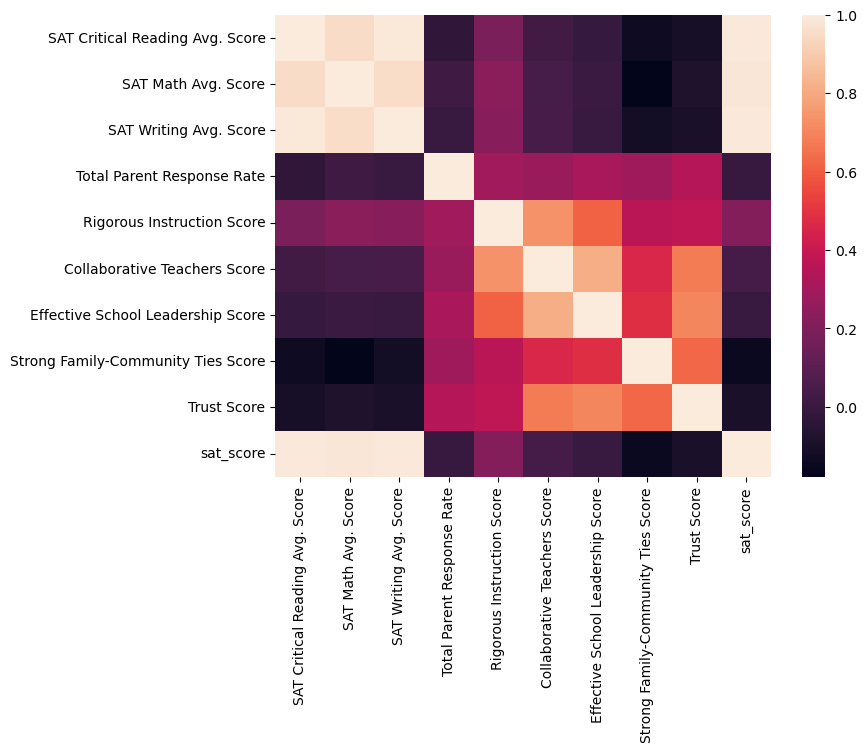

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_columns = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score', 
                   'Total Parent Response Rate', 'Rigorous Instruction Score', 'Collaborative Teachers Score', 
                   'Effective School Leadership Score', 'Strong Family-Community Ties Score', 'Trust Score', 'sat_score']
plt.subplots(figsize=(8,6))
df_heatmap = numeric_df[heatmap_columns]
sns.heatmap(df_heatmap.corr())

Each of these items is a potential angle to explore and tell a story about using the data.

# Setting the context

Before we dive into exploring the data, we’ll want to set the context, both for ourselves, and anyone else that reads our analysis. One good way to do this is with exploratory charts or maps. In this case, we’ll map out the positions of the schools, which will help readers understand the problem we’re exploring. In the below code, we:

- Setup a map centered on New York City.
- Add a marker to the map for each high school in the city.
- Display the map.

In [332]:
full['lat'] = full['lat'].fillna(full['lat'].mean())
full['lon'] = full['lon'].fillna(full['lon'].mean())

This map is helpful, but it’s hard to see where the most schools are in NYC. Instead, we’ll make a heatmap:

In [333]:
schools_heatmap = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
schools_heatmap.add_child(plugins.HeatMap([[row["lat"], row["lon"]] for name, row in full.iterrows()]))
schools_heatmap.save("heatmap.html")
schools_heatmap

# District level mapping
Heatmaps are good for mapping out gradients, but we’ll want something with more structure to plot out differences in SAT score across the city. School districts are a good way to visualize this information, as each district has its own administration. New York City has several dozen school districts, and each district is a small geographic area.
We can compute SAT score by school district, then plot this out on a map. In the below code, we’ll:

# Group full by school district.
Compute the average of each column for each school district.
Convert the school_dist field to remove leading 0s, so we can match our geograpghic district data.

In [335]:
full['school_dist'] = pd.to_numeric(full['school_dist'], errors='coerce')
full['school_dist'].dtypes

dtype('int64')

In [336]:
numeric_cols = full.select_dtypes(include='number').columns
district_data = full.groupby("school_dist")[numeric_cols] #.agg('mean')
# district_data.reset_index(inplace=True)
# district_data["school_dist"] = district_data["school_dist"].apply(lambda x: str(int(x)))

# Exploring enrollment and SAT scores
Now that we’ve set the context by plotting out where the schools are, and SAT score by district, people viewing our analysis have a better idea of the context behind the dataset. Now that we’ve set the stage, we can move into exploring the angles we identified earlier, when we were finding correlations. The first angle to explore is the relationship between the number of students enrolled in a school and SAT score.
We can explore this with a scatter plot that compares total enrollment across all schools to SAT scores across all schools.
full.plot.scatter(x='total_enrollment', y='sat_score')

<Axes: xlabel='total_enrollment', ylabel='sat_score'>

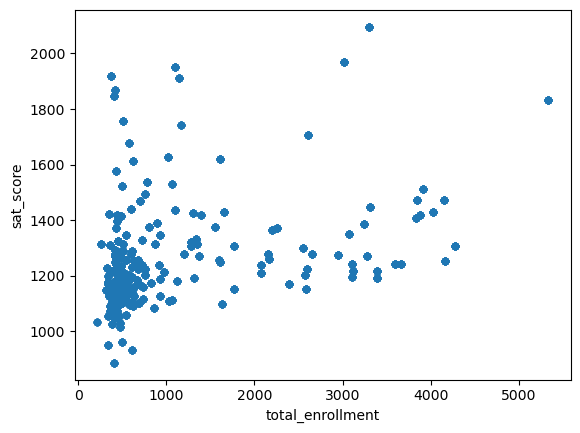

In [337]:
full.plot.scatter(x='total_enrollment', y='sat_score')

As you can see, there’s a cluster at the bottom left with low total enrollment and low SAT scores. Other than this cluster, there appears to only be a slight positive correlation between SAT scores and total enrollment. Graphing out correlations can reveal unexpected patterns.
We can explore this further by getting the names of the schools with low enrollment and low SAT scores:

In [341]:
full[(full["total_enrollment"] < 800) & (full["sat_score"] < 1250)]["SchoolName_x"]

1                            UNIVERSITY NEIGHBORHOOD H.S.
2                            UNIVERSITY NEIGHBORHOOD H.S.
3                            UNIVERSITY NEIGHBORHOOD H.S.
4                            UNIVERSITY NEIGHBORHOOD H.S.
5                            UNIVERSITY NEIGHBORHOOD H.S.
                              ...                        
3755    Bushwick Leaders High School for Academic Exce...
3756    Bushwick Leaders High School for Academic Exce...
3757    Bushwick Leaders High School for Academic Exce...
3758    Bushwick Leaders High School for Academic Exce...
3759    Bushwick Leaders High School for Academic Exce...
Name: SchoolName_x, Length: 1625, dtype: object

Some searching on Google shows that most of these schools are for students who are learning English, and are low enrollment as a result. This exploration showed us that it’s not total enrollment that’s correlated to SAT score — it’s whether or not students in the school are learning English as a second language or not.

<Axes: xlabel='ell_percent', ylabel='sat_score'>

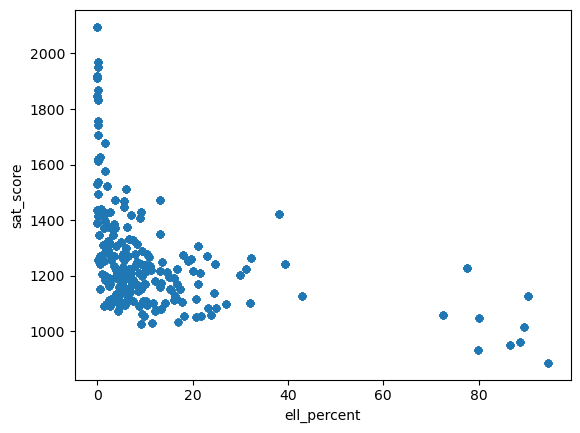

In [342]:
full.plot.scatter(x='ell_percent', y='sat_score')

It looks like there are a group of schools with a high ell_percentage that also have low average SAT scores. We can investigate this at the district level, by figuring out the percentage of English language learners in each district, and seeing it if matches our map of SAT scores by district: show_district_map("ell_percent")

As we can see by looking at the two district level maps, districts with a low proportion of ELL learners tend to have high SAT scores, and vice versa.

Correlating survey scores and SAT scores
It would be fair to assume that the results of student, parent, and teacher surveys would have a large correlation with SAT scores. It makes sense that schools with high academic expectations, for instance, would tend to have higher SAT scores. To test this theory, lets plot out SAT scores and the various survey metrics:

<Axes: >

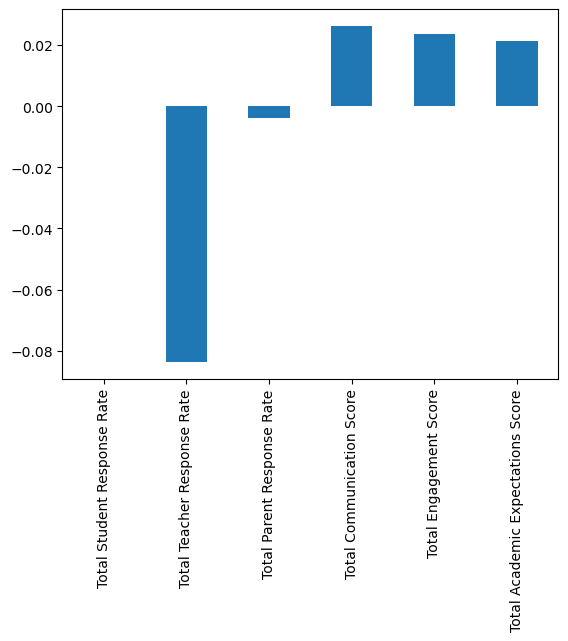

In [343]:
cols = ['Total Student Response Rate', 'Total Teacher Response Rate', 'Total Parent Response Rate', 'Total Communication Score', 'Total Engagement Score', 'Total Academic Expectations Score']

for col in cols:
    full[col] = pd.to_numeric(full[col], errors='coerce')
    full[col] = full[col].fillna(full[col].mean())
    
numeric_full = full.select_dtypes(include=['number'])
fullcorr_matrix = numeric_full.corr() 

   
fullcorr_matrix['sat_score'][cols].plot.bar()

Factors, like engagement, communication, and academic expectations, are positively correlated with SAT scores. howerver the Total TeacherResposnerate is highly neagtivelycorrelated with the SAT Score. This may indicate that NYC is asking the wrong questions to the teachers in surveys, or thinking about the wrong factors (if their goal is to improve SAT scores, it may not be).

It looks like the higher percentages of white and asian students correlate with higher SAT scores, but higher percentages of black and hispanic students correlate with lower SAT scores. For hispanic students, this may be due to the fact that there are more recent immigrants who are ELL learners.
It looks like there is some correlation with ELL percentage, but it will be necessary to do some more digging into this and other racial differences in SAT scores. Gender differences in SAT scores.
The final angle to explore is the relationship between gender and SAT score. We noted that a higher percentage of females in a school tends to correlate with higher SAT scores. We can visualize this with a bar graph:

<Axes: >

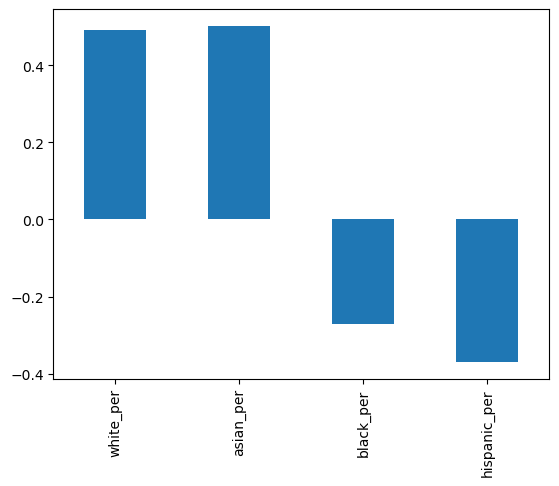

In [344]:
cols = ["white_per", "asian_per", "black_per", "hispanic_per"]

for col in cols:
    full[col] = pd.to_numeric(full[col], errors='coerce')
    full[col] = full[col].fillna(full[col].mean())
    
numeric_full = full.select_dtypes(include=['number'])
fullcorr_matrix = numeric_full.corr() 

   
fullcorr_matrix['sat_score'][cols].plot.bar()

To dig more into the correlation, we can make a scatterplot of female_per and sat_score:

<Axes: xlabel='female_per', ylabel='sat_score'>

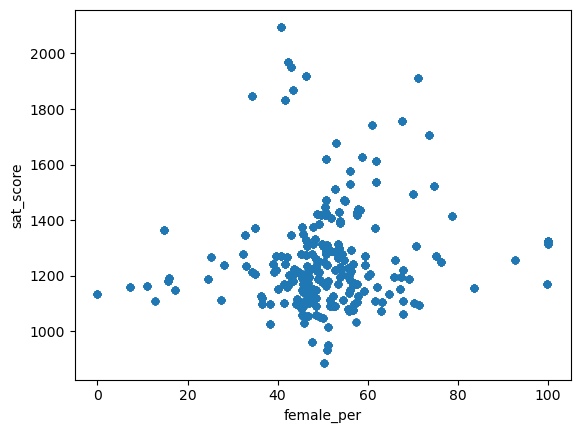

In [345]:
full.plot.scatter(x='female_per', y='sat_score')

It looks like there’s a cluster of schools with a high percentage of females, and very high SAT scores (in the top right). We can get the names of the schools in this cluster:

In [346]:
school_names = full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["SchoolName_x"].tolist()
print(school_names)

['PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'PROFESSIONAL PERFORMING ARTS', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High Sc

Searching Google reveals that these are elite schools that focus on the performing arts. These schools tend to have higher percentages of females, and higher SAT scores. This likely accounts for the correlation between higher female percentages and SAT scores, and the inverse correlation between higher male percentages and lower SAT scores.
AP scores So far, we’ve looked at demographic angles. One angle that we have the data to look at is the relationship between more students taking Advanced Placement exams and higher SAT scores. It makes sense that they would be correlated, since students who are high academic achievers tend to do better on the SAT.

<Axes: xlabel='ap_avg', ylabel='sat_score'>

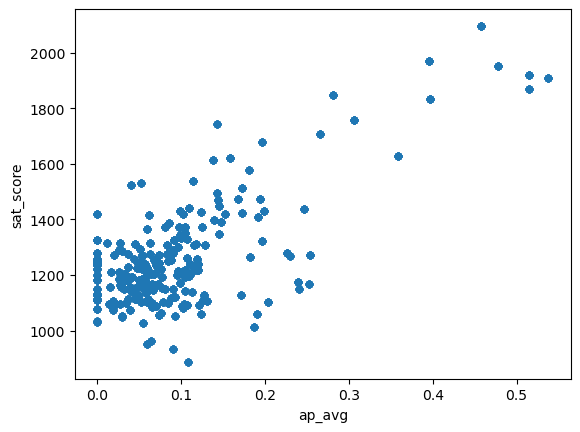

In [347]:
full["ap_avg"] = full["AP Test Takers _x"] / full["total_enrollment"]
full.plot.scatter(x='ap_avg', y='sat_score')

It looks like there is indeed a strong correlation between the two. An interesting cluster of schools is the one at the top right, which has high SAT scores and a high proportion of students that take the AP exams:

In [348]:
school_names = full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["SchoolName_x"].tolist()
print(school_names)

['Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'Eleanor Roosevelt High School', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'STUYVESANT HS', 'BRONX HS OF SCIENCE', 'BRONX HS OF SCIENCE', 'BRONX HS OF SCIENCE', 'BRONX HS OF 

Some Google searching reveals that these are mostly highly selective schools where you need to take a test to get in. It makes sense that these schools would have high proportions of AP test takers.

# Wrapping up the story

With data science, the story is never truly finished. By releasing this analysis to others, I am enabling them to extend and shape my analysis in whatever direction interests them. For example, in this notebook, there are quite a few angles that we explored inmcompletely, and could have dived into more.

One of the best ways to get started with telling stories using data is to try to extend or replicate the analysis someone else has done. If you decide to take this route, you’re welcome to extend the analysis in this notebook and see what you can find. If you do this, make sure to let me know so I can take a look.